***For T = 10  <Energy>= 5.00975441139388
For T = 10  <Energy^2>= 81.58082003178728
For T = 10  Error= 0.005314281737417901
For T = 10  Acceptance ratio=  0.5955005 after equilibrium is achieved***

***For T = 100  <Energy>= 50.05713232714142
For T = 100  <Energy^2>= 7500.02432731322
For T = 100  Error= 0.0499715310476689
For T = 100  Acceptance ratio=  0.8604665 after equilibrium is achieved***

***For T = 400  <Energy>= 200.72478398579727
For T = 400  <Energy^2>= 121511.04903053449
For T = 400  Error= 0.2015199867561398
For T = 400  Acceptance ratio=  0.929867 after equilibrium is achieved***



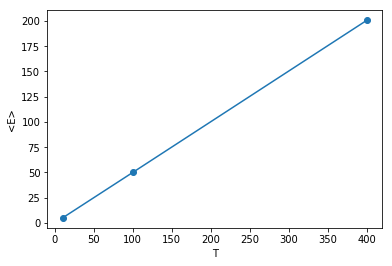

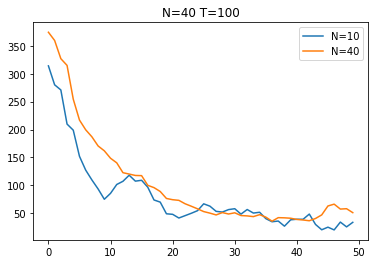

In [1]:
# Part-4


%matplotlib inline
import numpy as np
from matplotlib import pyplot

def metropolis(vold):
    global delta, T
    vtrial = np.random.random()    
    vtrial = vold+(2*vtrial-1)*delta
    weight = np.exp(-(vtrial**2-vold**2)/T)
    vnew = vold
    if(weight >= 1): #Accept
        vnew = vtrial
    elif(weight != 0):
        r = np.random.random()
        if(r <= weight): #Accept
            vnew = vtrial
    return vnew


def canonical(nwalkers,T_i,Nwarmup,v_i):
    T = T_i
    
    v = np.zeros(nwalkers) #array for velocity .    
    v.fill(v_i)         #initial velocity
    
     # Measurement loop

    Nmeasure = 100000
    Naccept = 0.
    E = 0.
    E2 = 0.
    for j in range(Nmeasure):
        for i in range(nwalkers):
            vold = v[i]
            v[i] = metropolis(v[i])
            if(v[i] != vold):
                Naccept += 1

        E = E + np.sum(v**2)
        E2 = E2 + np.sum(v**4)

    E = E/Nmeasure/nwalkers
    E2 = E2/Nmeasure/nwalkers
    print("***For T =",T," <Energy>=", E)
    print("For T =",T," <Energy^2>=", E2)
    print("For T =",T," Error=", np.sqrt((E2-E**2)/Nmeasure/nwalkers))

    print("For T =",T," Acceptance ratio= ", Naccept/float(Nmeasure*nwalkers),"after equilibrium is achieved***\n")
    
    return E,E2

N = [10,20,40]
Temp = [10,100,400]
delta = 5
E_mean = [0,0,0]


for i in range(len(Temp)):
    T = Temp[i]
    E_mean[i] = canonical(N[1],T,100,20)[0]   # Nwarmup = 100, initial velocity = 20
    
pyplot.figure()   
pyplot.plot(Temp,E_mean,marker='o')
pyplot.xlabel('T')
pyplot.ylabel('<E>')

pyplot.figure()

# find steps to warm_up

def warmup_fn(nwalkers,T_i,Nwarmup,v0):

    v = np.zeros(nwalkers)
    v.fill(v0)
    T = T_i
    Ewarmup = np.zeros(Nwarmup)

    Naccept = 0.
    for j in range(Nwarmup):
        for i in range(nwalkers):
            vold = v[i]
            v[i] = metropolis(v[i])
            if(v[i] != vold):
                Naccept += 1

        Ewarmup[j] = np.sum(v**2)/nwalkers

    x = np.arange(0,Nwarmup,1)
    pyplot.plot(x,Ewarmup,ls='-',label='N={}'.format(nwalkers));  
    pyplot.title("N={} T=100".format(nwalkers))
    pyplot.legend()
    
    return Ewarmup
delta = 5
T = 100
a = warmup_fn(10,100,50,20)
b = warmup_fn(40,100,50,20)

In [2]:
print("It can be seen that N=40 takes more time to reach equilibrium. This happens due to larger number of random walkers")

It can be seen that N=40 takes more time to reach equilibrium. This happens due to larger number of random walkers


As log(P) vs E is a stright line passing through origin, P(E) does follow Boltzmann distribution


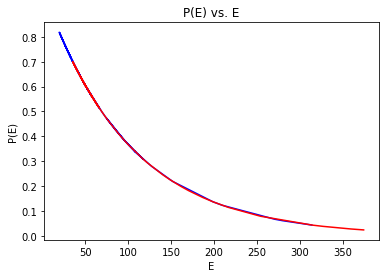

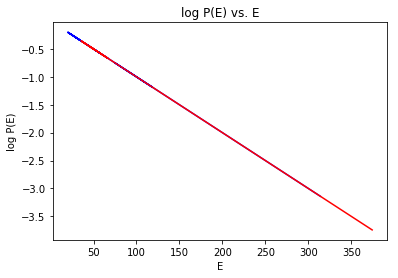

In [3]:
# part 5

P_a = np.exp(-a/100)
P_b = np.exp(-b/100)
pyplot.figure()
pyplot.plot(a,P_a,'-b',label='N=10')
pyplot.plot(b,P_b,'-r',label='N=40')
pyplot.title("P(E) vs. E")
pyplot.xlabel("E")
pyplot.ylabel("P(E)")

pyplot.figure()
pyplot.plot(a,np.log(P_a),'-b',label='N=10')
pyplot.plot(b,np.log(P_b),'-r',label='N=40')
pyplot.title("log P(E) vs. E")
pyplot.xlabel("E")
pyplot.ylabel("log P(E)")

print('As log(P) vs E is a stright line passing through origin, P(E) does follow Boltzmann distribution')


***For T = 10  <Energy>= 5.029527849038503
For T = 10  <Energy^2>= 81.62514666713496
For T = 10  Error= 0.005307023472855621
For T = 10  Acceptance ratio=  0.595453 after equilibrium is achieved***

***For T = 20  <Energy>= 10.065928523063732
For T = 20  <Energy^2>= 309.83747806794565
For T = 20  Error= 0.010210645450619605
For T = 20  Acceptance ratio=  0.699661 after equilibrium is achieved***

***For T = 30  <Energy>= 15.044486778019541
For T = 30  <Energy^2>= 684.0565256245369
For T = 30  Error= 0.015128118574537485
For T = 30  Acceptance ratio=  0.7510915 after equilibrium is achieved***

***For T = 40  <Energy>= 20.06452890859082
For T = 40  <Energy^2>= 1217.5639629845678
For T = 40  Error= 0.020186364737873077
For T = 40  Acceptance ratio=  0.782644 after equilibrium is achieved***

***For T = 50  <Energy>= 25.140214911904934
For T = 50  <Energy^2>= 1910.17532975383
For T = 50  Error= 0.02527988255448453
For T = 50  Acceptance ratio=  0.804526 after equilibrium is achieved***

*

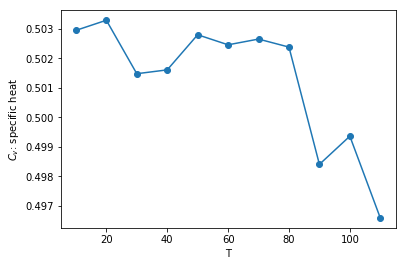

In [4]:
# part 6

T_array = [10,20,30,40,50,60,70,80,90,100,110]
N = 20
delta = 5
C_v = [0,0,0,0,0,0,0,0,0,0,0]
mean_squ_E = []

for i in range(len(T_array)):
    T = T_array[i]
    b = canonical(N,T,100,20)
    C_v[i] = b[0]/T   # Nwarmup = 100, initial velocity = 20
    if T==10 or T==40:
        a = b[1]-b[0]**2
        mean_squ_E.append(a)
    
pyplot.figure()   
pyplot.plot(T_array,C_v,marker='o')
pyplot.xlabel('T')
pyplot.ylabel('$C_v$: specific heat')

Heat_capacity = np.average(C_v)
print('Estimated heat capacity =',Heat_capacity)


Mean square energy fluctuation for T=10 is 56.32899628288108 and for T=40 is 814.9786426608911
Ratio of two heat capacities at T=10 is 1.1199658889183708
Ratio of two heat capacities at T=40 is 1.0154470189329365


Text(0.5, 1.0, 'Comparison of $C_v$')

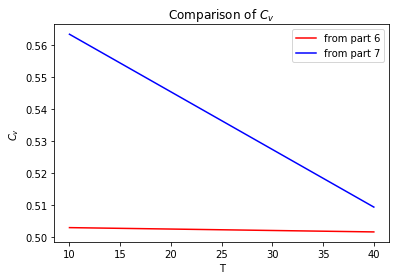

In [5]:
# part 7


del_E2_T_10 = mean_squ_E[0]
del_E2_T_40 = mean_squ_E[1]
print('Mean square energy fluctuation for T=10 is', del_E2_T_10,'and for T=40 is',del_E2_T_40)

C_v_10_previous = C_v[0]
C_v_40_previous = C_v[3]

C_v_10_now = del_E2_T_10/(10)**2
C_v_40_now = del_E2_T_40/(40)**2

ratio1 = C_v_10_now/C_v_10_previous
ratio2 = C_v_40_now/C_v_40_previous

print('Ratio of two heat capacities at T=10 is',ratio1)
print('Ratio of two heat capacities at T=40 is',ratio2)

C_v_then = [C_v_10_previous,C_v_40_previous]
C_v_now = [C_v_10_now,C_v_40_now]
T_f = [10,40]

pyplot.figure()
pyplot.plot(T_f,C_v_then,'-r',label='from part 6')
pyplot.plot(T_f,C_v_now,'-b',label='from part 7')
pyplot.xlabel('T')
pyplot.ylabel('$C_v$')
pyplot.legend()
pyplot.title('Comparison of $C_v$')